First, we will read the data generated in a run.

3.9600E+00
3.96


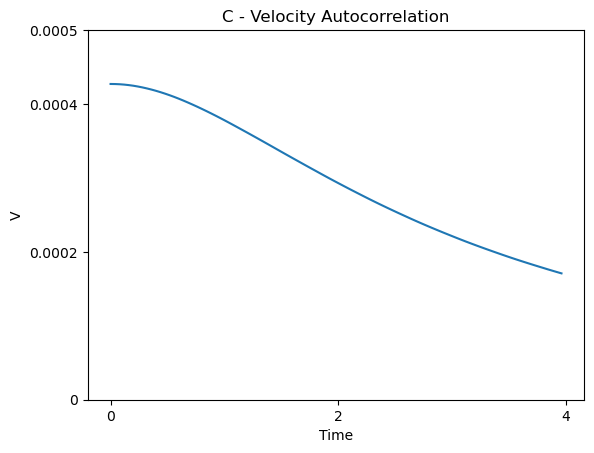

In [60]:
import matplotlib.pyplot as plt
import numpy as np

Time = []
Vac = []

try:
    with open('vacf_0.txt', 'r') as file:
        # Skip the first line
        next(file)  #

            # Read the remaining lines and split them into columns
        for line in file:
            # Split the line into parts based on whitespace (default) or a specific delimiter
            parts = line.strip().split() 
            if len(parts) == 2:  # Ensure there are exactly two columns
                Time.append(parts[0])
                Vac.append(parts[1])
except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(Time[99])

# Convert data to floats
Time = np.array([float(x) for x in Time])
Vac = np.array([float(y) for y in Vac])

print(Time[99])

# Plotting the data
#plt.scatter(Time, Vac, color='blue', label='Data Points', zorder=2) # zorder ensures points are on top

plt.plot(Time, Vac)

# Adding labels and title (optional)
plt.xlabel('Time')
plt.ylabel('V')
plt.title('C - Velocity Autocorrelation')
plt.xticks([0, 2, 4], ['0', '2', '4'])  # Set ticks at 0 and L, with labels '0' and 'L'

plt.yticks([0, 0.0002, 0.0004, 0.0005], [0, 0.0002, 0.0004, 0.0005])  # Set ticks at 0 and L, with labels '0' and 'L'
plt.show()


Now, we will write a short code to perform the discrete fourier transform:

In [62]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

We will do the transform on the data.

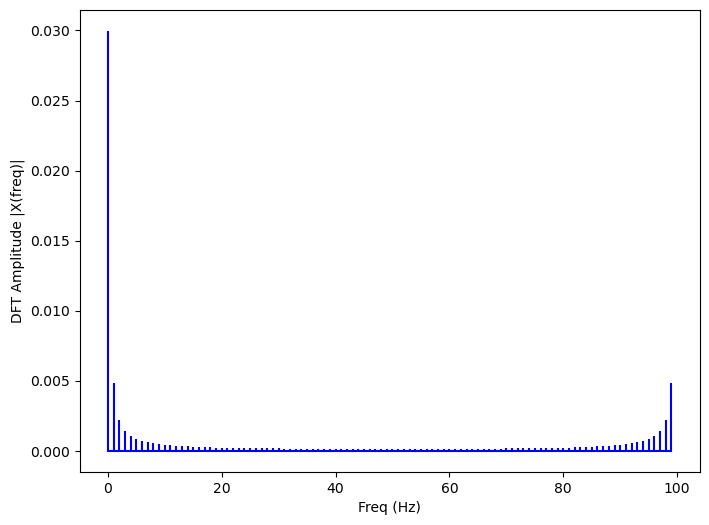

In [67]:
X = DFT(Vac)
sr = len(Vac)
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate.

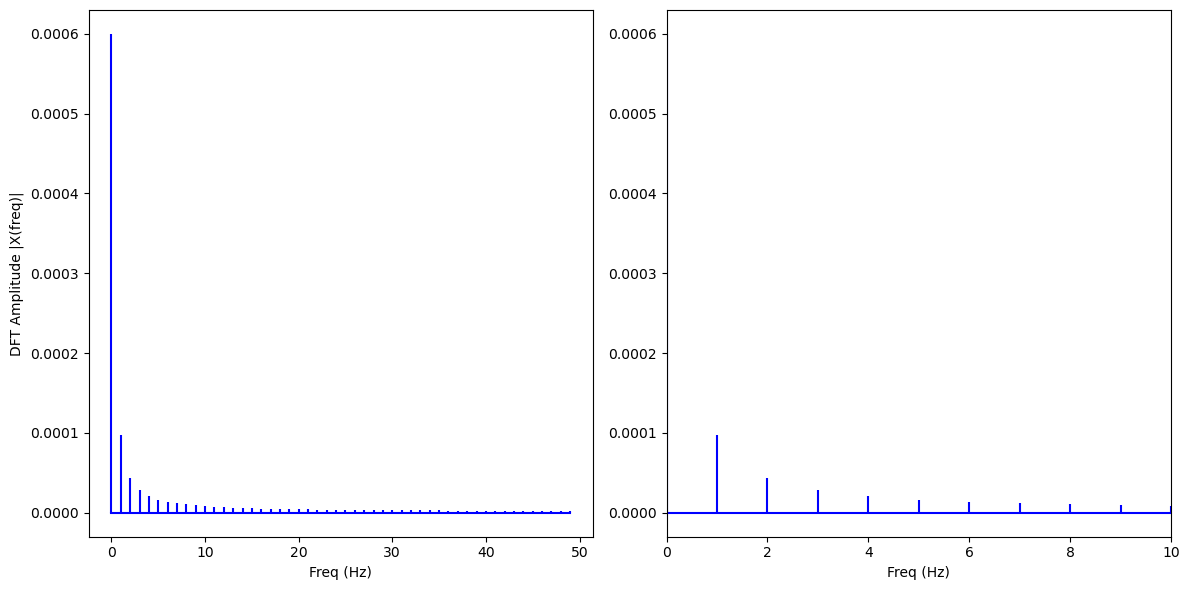

In [70]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()